In [5]:
import seaborn as sns
data = sns.load_dataset('diamonds')
data = data.select_dtypes(include = ['float64','int64'])
df = data.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [8]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [9]:
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [10]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [11]:
df_scores = clf.negative_outlier_factor_

In [12]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [13]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

# graph analysis

<AxesSubplot:>

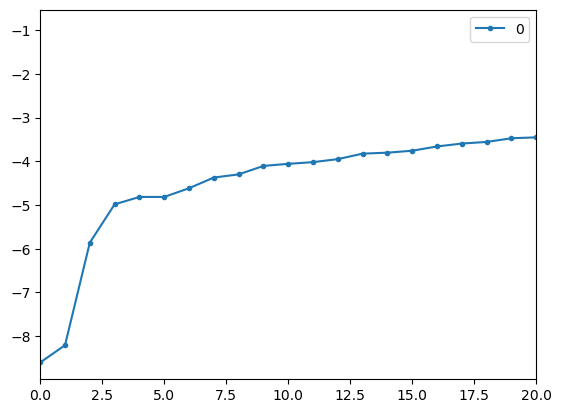

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True,xlim=[0,20],style=".-")

In [20]:
esik_deger = np.sort(df_scores)[3]

In [21]:
esik_deger

-4.984151747711709

In [23]:
baski_deger = df[df_scores == esik_deger]

In [37]:
aykirilar = df[df_scores < esik_deger]

In [38]:
res = aykirilar.to_records(index=False)

In [39]:
res

rec.array([(1.03, 78.2, 54. , 1262, 5.72,  5.59,  4.42),
           (0.51, 61.8, 54.7, 1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. , 2075, 5.15, 31.8 ,  5.12)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [40]:
res[:] = baski_deger.to_records(index=False)

In [41]:
res

rec.array([(0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58),
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58),
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [42]:
aykirilar

,carat,depth,table,price,x,y,z
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [45]:
index_aykirilar = aykirilar.index

In [46]:
index_aykirilar

Int64Index([41918, 48410, 49189], dtype='int64')

In [51]:
aykiri_tf = df_scores < esik_deger

In [61]:
df[df_scores < esik_deger] == pd.DataFrame(res,index=index_aykirilar)

,carat,depth,table,price,x,y,z
41918,False,False,False,False,False,False,False
48410,False,False,False,False,False,False,False
49189,False,False,False,False,False,False,False
